In [3]:
%load_ext autoreload
%autoreload 2

In [302]:
## LOAD SIGNALS
import os
import pandas as pd
import numpy as np

task_names = {
  'e': 'extension',
  'f': 'flexion',
  'p': 'pronation',
  's': 'supination'
}
sfreq = 2048
s_duration = 10

def load_metadata(path):
  columns = ['subject', 'task', '%mvc', 'bicep_path', 'torque_path']
  rows = []
  curr_row = 0
  for dirpath, dirnames, files in os.walk(path):
    if dirpath.endswith('biceps'):
      for filename in files:
        if filename.endswith('.bin'):
          basename = os.path.splitext(filename)[0]
          bb_sample_path = os.path.join(dirpath, filename)
          details = basename.split('_')

          # Get corresponding torque data
          torque_path = bb_sample_path.replace('biceps', 'torque')
          torque_path = torque_path.replace('bb', 'torque')

          row = {
            'subject': details[0],
            'task': task_names[details[1][0]],
            '%mvc': int(details[1][1:]),
            'bicep_path': bb_sample_path,
            'torque_path': torque_path
          }
          rows.append(row)
          curr_row += 1
  
  meta = pd.DataFrame(rows, columns=columns).sort_values('subject', ignore_index=True)
  meta.reset_index()
  return meta
    
metadata = load_metadata('dataset')
metadata['subject'] = metadata['subject'].astype('string')
metadata

,subject,task,%mvc,bicep_path,torque_path
0,s1,flexion,50,dataset/s1/biceps/s1_f50_bb.bin,dataset/s1/torque/s1_f50_torque.bin
1,s1,flexion,30,dataset/s1/biceps/s1_f30_bb.bin,dataset/s1/torque/s1_f30_torque.bin
2,s1,extension,50,dataset/s1/biceps/s1_e50_bb.bin,dataset/s1/torque/s1_e50_torque.bin
3,s1,supination,30,dataset/s1/biceps/s1_s30_bb.bin,dataset/s1/torque/s1_s30_torque.bin
4,s1,pronation,50,dataset/s1/biceps/s1_p50_bb.bin,dataset/s1/torque/s1_p50_torque.bin
...,...,...,...,...,...
139,s9,flexion,30,dataset/s9/biceps/s9_f30_bb.bin,dataset/s9/torque/s9_f30_torque.bin
140,s9,pronation,50,dataset/s9/biceps/s9_p50_bb.bin,dataset/s9/torque/s9_p50_torque.bin
141,s9,supination,30,dataset/s9/biceps/s9_s30_bb.bin,dataset/s9/torque/s9_s30_torque.bin
142,s9,pronation,10,dataset/s9/biceps/s9_p10_bb.bin,dataset/s9/torque/s9_p10_torque.bin


## Load subject details
- Height (cm)
- Weight (kg)
- Biceps circumference (cm)
- Biceps length (cm)
- Triceps circumference (cm)
- Triceps circumference (cm)

In [303]:
def load_subject_attributes(path):
    df = pd.read_csv(path, sep="\t", header=0)
    return df

details = load_subject_attributes('dataset/SubjectsDescription.txt')
details['subject'] = details['subject'].astype('string')
details

,subject,age,height,weight_kg,biceps_circumference,biceps_length,triceps_circumference,triceps_length,forearm_circumference,forearm_length
0,s1,28,176,76,31.0,33.0,31.0,40.0,26.0,30.0
1,s2,29,183,90,36.0,33.0,34.0,39.0,32.0,30.0
2,s3,21,183,83,37.0,33.5,34.0,41.0,32.0,30.0
3,s4,31,175,68,30.5,30.0,29.0,34.0,27.0,29.0
4,s5,28,176,70,29.0,30.0,28.0,34.0,20.0,28.0
5,s6,22,187,82,32.0,30.0,30.0,40.0,28.0,31.0
6,s7,22,175,72,33.0,31.0,30.0,38.0,27.0,29.0
7,s8,27,171,68,34.0,34.0,30.0,37.0,29.0,30.0
8,s9,28,168,75,32.5,30.0,34.0,37.0,27.0,28.0
9,s10,40,178,83,33.0,32.5,34.0,37.5,28.0,26.5


In [304]:
metadata = load_metadata('dataset')
metadata['subject'] = metadata['subject'].astype('string')
details = load_subject_attributes('dataset/SubjectsDescription.txt')
details['subject'] = details['subject'].astype('string')
details

metadata = metadata.merge(details, on='subject', how='left')
metadata

,subject,task,%mvc,bicep_path,torque_path,age,height,weight_kg,biceps_circumference,biceps_length,triceps_circumference,triceps_length,forearm_circumference,forearm_length
0,s1,flexion,50,dataset/s1/biceps/s1_f50_bb.bin,dataset/s1/torque/s1_f50_torque.bin,28,176,76,31.0,33.0,31.0,40.0,26.0,30.0
1,s1,flexion,30,dataset/s1/biceps/s1_f30_bb.bin,dataset/s1/torque/s1_f30_torque.bin,28,176,76,31.0,33.0,31.0,40.0,26.0,30.0
2,s1,extension,50,dataset/s1/biceps/s1_e50_bb.bin,dataset/s1/torque/s1_e50_torque.bin,28,176,76,31.0,33.0,31.0,40.0,26.0,30.0
3,s1,supination,30,dataset/s1/biceps/s1_s30_bb.bin,dataset/s1/torque/s1_s30_torque.bin,28,176,76,31.0,33.0,31.0,40.0,26.0,30.0
4,s1,pronation,50,dataset/s1/biceps/s1_p50_bb.bin,dataset/s1/torque/s1_p50_torque.bin,28,176,76,31.0,33.0,31.0,40.0,26.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,s9,flexion,30,dataset/s9/biceps/s9_f30_bb.bin,dataset/s9/torque/s9_f30_torque.bin,28,168,75,32.5,30.0,34.0,37.0,27.0,28.0
140,s9,pronation,50,dataset/s9/biceps/s9_p50_bb.bin,dataset/s9/torque/s9_p50_torque.bin,28,168,75,32.5,30.0,34.0,37.0,27.0,28.0
141,s9,supination,30,dataset/s9/biceps/s9_s30_bb.bin,dataset/s9/torque/s9_s30_torque.bin,28,168,75,32.5,30.0,34.0,37.0,27.0,28.0
142,s9,pronation,10,dataset/s9/biceps/s9_p10_bb.bin,dataset/s9/torque/s9_p10_torque.bin,28,168,75,32.5,30.0,34.0,37.0,27.0,28.0


In [305]:
import pandas as pd
import numpy as np

def load_signals(metadata):
    emg_list = []
    dtype = np.dtype('<f8')
    num_channels = 120
    sfreq = 2048  # Sampling frequency
    
    for signal_no, row in metadata.iterrows():
        data = np.fromfile(row['bicep_path'], dtype=dtype)
        reshaped_data = data.reshape((-1, num_channels))
        num_samples = reshaped_data.shape[0]

        sample_indices = np.arange(num_samples)
        
        index = pd.MultiIndex.from_arrays([[signal_no] * num_samples, sample_indices], names=['signal', 'sample'])
        temp_df = pd.DataFrame(reshaped_data, index=index)
        emg_list.append(temp_df)
        
    df = pd.concat(emg_list)
    return df

emg_df = load_signals(metadata)

In [3]:
# Load torque data
# def load_torque_signals(metadata):
#     torque_list = []
#     dtype = np.dtype('<f8')
#     channels = ['left', 'right']
#     sfreq = 2048  # Sampling frequency
    
#     for signal_no, row in metadata.iterrows():
#         data = np.fromfile(row['torque_path'], dtype=dtype)
#         reshaped_data = data.reshape((-1, 2))
#         num_samples = reshaped_data.shape[0]

#         sample_indices = np.arange(num_samples)
        
#         # index = pd.MultiIndex.from_arrays([[signal_no] * num_samples, sample_indices], names=['signal'])
#         # index = 
#         temp_df = pd.DataFrame(reshaped_data, columns=channels)
#         temp_df['signal'] = signal_no
#         temp_df = temp_df.set_index('signal')

#         torque_list.append(temp_df)
        
#     df = pd.concat(torque_list)
#     df['torque'] = df['left'] + df['right']
#     df = df.groupby('signal').mean()
#     return df

# torque_df = load_torque_signals(metadata)
# torque_df

,left,right,torque
signal,,,
0,-232.603125,85.282129,-147.320996
1,-166.464551,28.546289,-137.918262
2,40.157129,-182.458252,-142.301123
3,-62.315430,-45.749023,-108.064453
4,-171.542432,-107.175977,-278.718408
...,...,...,...
139,24.232617,-155.689648,-131.457031
140,-130.481201,-93.573828,-224.055029
141,-9.375586,-105.372705,-114.748291


In [306]:
## Channel Selection with numpy
from src.preprocessing import *

data = emg_df.to_numpy()

psds = calculate_psd(data)
normalize_psds = normalize_psd(psds)
corr_matrix = pearson_correlation(data)
mean_corr = mean_absolute_correlation(corr_matrix)
pcr = calculate_pcr(normalize_psds, mean_corr)

# Use the top 10 channels
selected_channels = np.argsort(pcr)[:10].tolist()
emg_df = emg_df.loc[:][selected_channels]
emg_df

6         5         14        4         112       13   \
signal sample                                                               
0      0      -0.676165 -0.671950 -0.676714 -0.662445 -0.578133 -0.677954   
       1      -0.526711 -0.544215 -0.536602 -0.535461 -0.426257 -0.551166   
       2      -0.309285 -0.347351 -0.326889 -0.353882 -0.250159 -0.355129   
       3      -0.257512 -0.296711 -0.251029 -0.312886 -0.201163 -0.303118   
       4      -0.280603 -0.324663 -0.275797 -0.351580 -0.250171 -0.321179   
...                 ...       ...       ...       ...       ...       ...   
143    20475  -0.274616 -0.261546 -0.314472 -0.267897 -0.302486 -0.297978   
       20476  -0.194027 -0.074936 -0.226523 -0.185095 -0.205590 -0.211029   
       20477  -0.032888 -0.094010 -0.074622 -0.024255 -0.051157 -0.057833   
       20478  -0.045827 -0.192053 -0.080964 -0.035120 -0.066583 -0.060397   
       20479  -0.286760 -0.271833 -0.307195 -0.283904 -0.314633 -0.299604   

                    3         2         12        104  
signal sample                                          
0      0      -0.655592 -0.611478 -0.680732 -0.684522  
       1      -0.541967 -0.503568 -0.574043 -0.523990  
       2      -0.360618 -0.321588 -0.382905 -0.307847  
       3      -0.317089 -0.286598 -0.329109 -0.227607  
       4      -0.346453 -0.316617 -0.354821 -0.239727  
...                 ...       ...       ...       ...  
143    20475  -0.268124 -0.264373 -0.302480 -0.315663  
       20476  -0.183095 -0.174741 -0.218702 -0.225896  
       20477  -0.028313 -0.018440 -0.068775 -0.063346  
       20478  -0.044838 -0.036306 -0.068890 -0.081183  
       20479  -0.273245 -0.279459 -0.318629 -0.337921  

[2936832 rows x 10 columns]

In [307]:
# Preprocessing
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(df, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return df.apply(lambda x: filtfilt(b, a, x), axis=0)

def rectify_and_smooth(df, window_size=100):
    rectified_df = np.abs(df)

    window = np.ones(window_size) / window_size
    smoothed_df = rectified_df.apply(lambda x: np.convolve(x, window, 'same'), axis=0)
    return smoothed_df

def preprocess_signal(df, fs):
    lowcut = 10.0
    highcut = 500.0
    order = 4

    # Band-pass filter
    processed_df = butter_bandpass_filter(df, lowcut, highcut, fs, order)

    # Rectification
    processed_df = rectify_and_smooth(processed_df)
    
    return processed_df


filtered_df = butter_bandpass_filter(emg_df, 10.0, 500.0, sfreq, 4)
rectified_df = rectify_and_smooth(filtered_df)

## EMG plot before/after processing

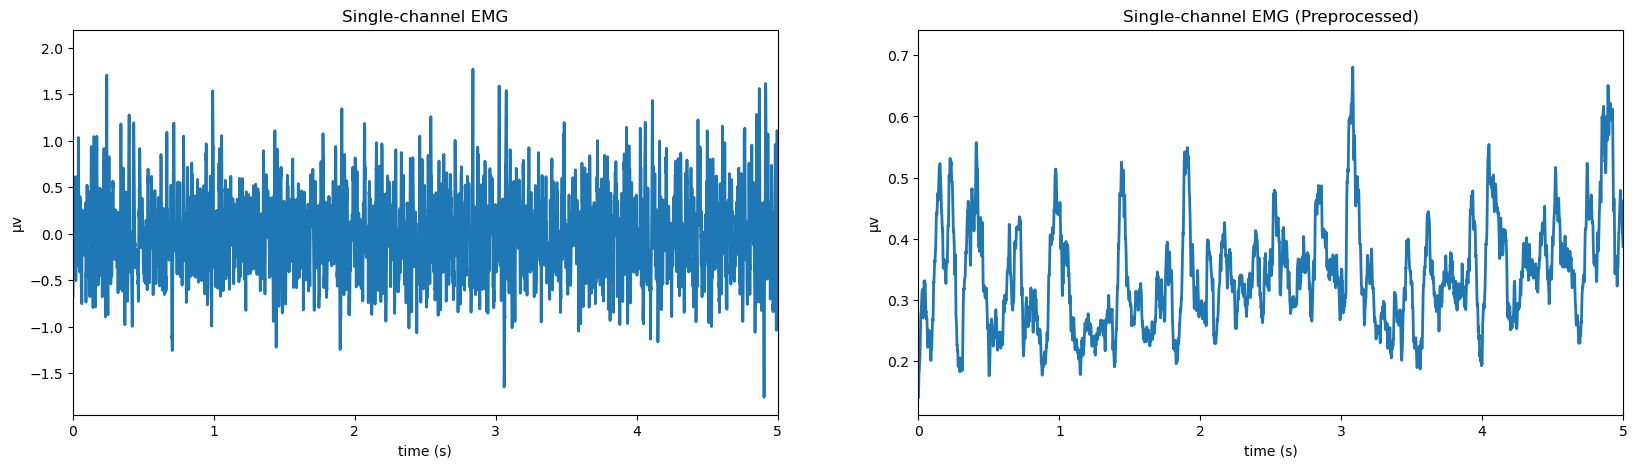

In [9]:
import matplotlib.pyplot as plt

time_a = np.linspace(0, s_duration, int(sfreq * s_duration))
emg_a = emg_df.loc[0][6]

time_b = np.linspace(0, s_duration, int(sfreq * s_duration))
emg_b = rectified_df.loc[0][6]


plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(time_a, emg_a, linewidth=2)
plt.xlim([0, 5])
plt.title('Single-channel EMG')
plt.xlabel('time (s)')
plt.ylabel('µv')

plt.subplot(1, 2, 2)
plt.plot(time_b, emg_b, linewidth=2)
plt.xlim([0, 5])
plt.title('Single-channel EMG (Preprocessed)')
plt.xlabel('time (s)')
plt.ylabel('µv')

plt.show()

In [8]:
# Average the torque data
# def avg_torque(df):
#     # average the left and right
#     torque_df = df.copy()
#     torque_df['left'] = torque_df['left'].abs()
#     torque_df['right'] = torque_df['right'].abs()

#     avg_torque_df = torque_df.groupby(level='signal')[['left', 'right']].mean()
#     avg_torque_df['torque'] = avg_torque_df.mean(axis=1)
#     avg_torque_df = avg_torque_df.drop(['left', 'right'], axis=1)
#     return avg_torque_df

# avg_torque = avg_torque(torque_df)
# avg_torque

In [308]:
from sklearn.decomposition import PCA

def create_feature_table(df):
    signals = df.index.get_level_values(0).unique().tolist()
    channels = df.columns.tolist()
    features = ['max', 'std', 'mean']
    
    new_index = pd.MultiIndex.from_product([signals, channels], names=['signal', 'channel'])
    feature_table = pd.DataFrame(index=new_index, columns=features)
    
    for signal in signals:
        signal_data = df.loc[signal]
        for channel in channels:
            channel_data = signal_data[channel]
            
            feature_table.loc[(signal, channel), 'max'] = channel_data.max()
            feature_table.loc[(signal, channel), 'std'] = channel_data.std()
            feature_table.loc[(signal, channel), 'mean'] = channel_data.mean()

    return feature_table


feature_table = create_feature_table(rectified_df)
feature_table


max       std      mean
signal channel                              
0      6        0.713323  0.090234  0.349886
       5        0.761048  0.094827  0.363424
       14       0.746063  0.095767  0.364824
       4        0.800767  0.098902  0.374888
       112      0.884461  0.111575   0.43024
...                  ...       ...       ...
143    13        0.35587  0.045807  0.199086
       3        0.305794  0.037881   0.17965
       2        0.297979  0.036009  0.175289
       12       0.344631  0.044938   0.19992
       104      0.441123  0.056633  0.222301

[1440 rows x 3 columns]

In [310]:
# Add frequency features
def mean_frequency(signal):
    fft_vals = np.fft.rfft(signal)
    fft_freq = np.fft.rfftfreq(len(signal), 1/sfreq)
    fft_power = np.abs(fft_vals)**2
    
    mean_freq = np.sum(fft_freq * fft_power) / np.sum(fft_power)
    return mean_freq

def first_pca_coeff(signal):
    pca = PCA(n_components=1)
    pca.fit(signal)
    coefficient = pca.components_[0,0]
    return coefficient

def frequency_features(df, feature_table):
    signals = df.index.levels[0]
    channels = df.index.levels[1]

    for signal in signals:
        signal_data = df.loc[signal]
        pca_coeff = first_pca_coeff(signal_data)
        mean_freq = mean_frequency(signal_data.values.flatten())

        # feature_table.loc[signal, 'pca_coeff'] = pca_coeff
        feature_table.loc[signal, 'mean_freq'] = mean_freq

frequency_features(filtered_df, feature_table)
feature_table

max       std      mean  mean_freq
signal channel                                         
0      6        0.713323  0.090234  0.349886  39.166621
       5        0.761048  0.094827  0.363424  39.166621
       14       0.746063  0.095767  0.364824  39.166621
       4        0.800767  0.098902  0.374888  39.166621
       112      0.884461  0.111575   0.43024  39.166621
...                  ...       ...       ...        ...
143    13        0.35587  0.045807  0.199086  33.454647
       3        0.305794  0.037881   0.17965  33.454647
       2        0.297979  0.036009  0.175289  33.454647
       12       0.344631  0.044938   0.19992  33.454647
       104      0.441123  0.056633  0.222301  33.454647

[1440 rows x 4 columns]

In [129]:
# def add_torque(feature_table, torque_df):
#     # Copy the feature table to avoid modifying the original DataFrame
#     temp = feature_table.copy()
#     temp = temp.reset_index(level='channel')
#     temp = temp.join(torque_df[['left', 'right']], on='signal')
#     return temp

# full_feature_table = add_torque(feature_table, torque_df)
# full_feature_table

,channel,max,std,mean,pca_coeff,mean_freq,left,right
signal,,,,,,,,
0,6,0.713323,0.090234,0.349886,0.285630,39.166621,-232.603125,85.282129
0,5,0.761048,0.094827,0.363424,0.285630,39.166621,-232.603125,85.282129
0,14,0.746063,0.095767,0.364824,0.285630,39.166621,-232.603125,85.282129
0,4,0.800767,0.098902,0.374888,0.285630,39.166621,-232.603125,85.282129
0,112,0.884461,0.111575,0.43024,0.285630,39.166621,-232.603125,85.282129
...,...,...,...,...,...,...,...,...
143,13,0.35587,0.045807,0.199086,0.305332,33.454647,25.660791,-114.927783
143,3,0.305794,0.037881,0.17965,0.305332,33.454647,25.660791,-114.927783
143,2,0.297979,0.036009,0.175289,0.305332,33.454647,25.660791,-114.927783


In [311]:
def add_subject_data(feature_table):
    temp = feature_table.copy()
    temp = temp.reset_index(level=['signal', 'channel'])
    temp = temp.join(metadata[['age', 'height', 'weight_kg', '%mvc']], on='signal')
    return temp

fft = add_subject_data(feature_table)
fft

,signal,channel,max,std,mean,mean_freq,age,height,weight_kg,%mvc
0,0,6,0.713323,0.090234,0.349886,39.166621,28,176,76,50
1,0,5,0.761048,0.094827,0.363424,39.166621,28,176,76,50
2,0,14,0.746063,0.095767,0.364824,39.166621,28,176,76,50
3,0,4,0.800767,0.098902,0.374888,39.166621,28,176,76,50
4,0,112,0.884461,0.111575,0.43024,39.166621,28,176,76,50
...,...,...,...,...,...,...,...,...,...,...
1435,143,13,0.35587,0.045807,0.199086,33.454647,28,168,75,50
1436,143,3,0.305794,0.037881,0.17965,33.454647,28,168,75,50
1437,143,2,0.297979,0.036009,0.175289,33.454647,28,168,75,50
1438,143,12,0.344631,0.044938,0.19992,33.454647,28,168,75,50


In [313]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = fft.drop(['signal', 'channel', '%mvc'], axis=1)
y = fft['%mvc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

,max,std,mean,mean_freq,age,height,weight_kg
743,0.255904,0.031951,0.147874,141.358356,31,175,68
402,0.905379,0.09098,0.441323,112.493070,37,179,65
383,0.168242,0.00702,0.019119,334.048397,37,179,65
207,0.052846,0.004035,0.028967,189.704126,40,178,83
277,0.261158,0.033131,0.13873,42.155498,29,173,64
...,...,...,...,...,...,...,...
1043,0.433706,0.046412,0.230006,16.771276,22,187,82
936,0.055928,0.007213,0.025987,164.468789,28,176,70
1378,0.206453,0.027149,0.095377,32.435518,28,168,75
757,0.220487,0.027013,0.112386,182.127805,31,175,68


In [314]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

          10       0.92      0.94      0.93       109
          30       0.86      0.93      0.89        84
          50       0.98      0.87      0.92        95

    accuracy                           0.92       288
   macro avg       0.92      0.92      0.92       288
weighted avg       0.92      0.92      0.92       288



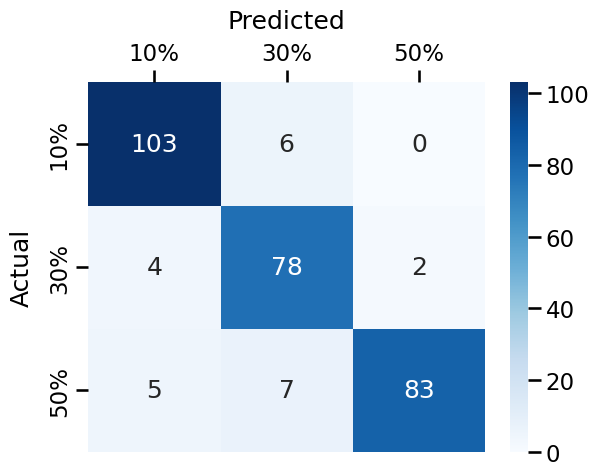

In [315]:
# generate confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.set_context('talk')

ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['10%','30%','50%'], yticklabels=['10%','30%','50%'])
ax.xaxis.tick_top()
ax.set_xlabel('Predicted', labelpad=10)
ax.set_ylabel('Actual', labelpad=10)
ax.xaxis.set_label_position('top')

plt.show()

## Retraining-based feature evaluation

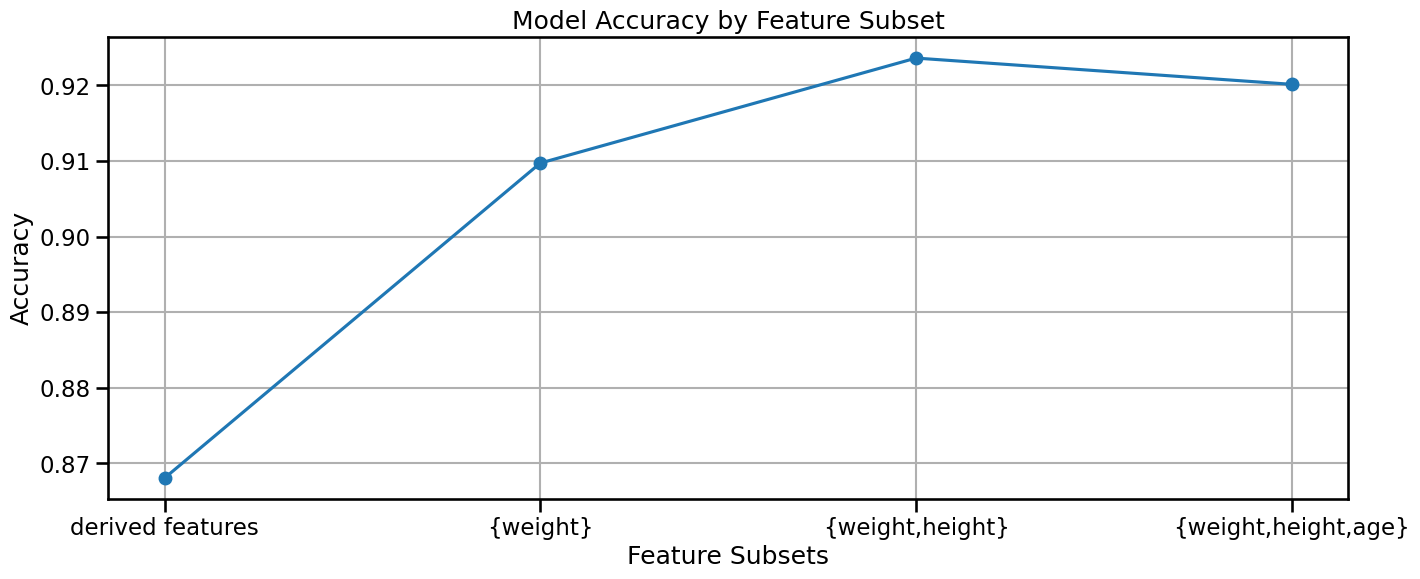

In [316]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = fft.drop(['signal', 'channel', '%mvc'], axis=1)
y = fft['%mvc']

subject_features = [
    ['max', 'std', 'mean', 'mean_freq'],
    ['max', 'std', 'mean', 'mean_freq', 'weight_kg'],
    ['max', 'std', 'mean', 'mean_freq', 'weight_kg', 'height'],
    ['max', 'std', 'mean', 'mean_freq', 'weight_kg', 'height', 'age']
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=19)

accuracies = []

for subset in subject_features:
    X_train_sub = X_train[:, [X.columns.get_loc(name) for name in subset]]
    X_test_sub = X_test[:, [X.columns.get_loc(name) for name in subset]]

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_sub, y_train)

    y_pred = model.predict(X_test_sub)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


plt.figure(figsize=(16, 6))
plt.plot(['derived features', '{weight}', '{weight,height}', '{weight,height,age}'], accuracies, marker='o')
plt.title('Model Accuracy by Feature Subset')
plt.xlabel('Feature Subsets')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
